In [ ]:
Применим линейную регрессию чтобы, предсказать стоимость машин и понять, 
от каких факторов зависит ценообразование на автомобили. 
Помимо этого узнаем, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(20,17)}, style='whitegrid')

In [4]:
df = pd.read_csv('cars.csv')

In [ ]:
Создадим новый признак - марку автомобиля

In [10]:
df['company'] = df.CarName.apply(lambda x: x.split(' ')[0])

In [ ]:
Удалим ненужные столбцы

In [ ]:
df.drop('car_ID', axis='columns', inplace=True)

In [20]:
df.drop('CarName', axis='columns', inplace=True)

In [25]:
df.company.unique()
# Есть ошибки в названиях марок

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [27]:
df.company = df.company.str.lower()

In [30]:
def change_names(name_1, name_2):
    df.company.replace(name_1, name_2, inplace=True)

In [31]:
change_names('maxda', 'mazda')
change_names('porcshce', 'porsche')
change_names('toyouta', 'toyota')
change_names('vokswagen', 'volkswagen')
change_names('vw', 'volkswagen')

C:\Users\user\AppData\Local\Temp\ipykernel_22080\338973360.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.company.replace(name_1, name_2, inplace=True)


In [32]:
df.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
Оставим только нужные стлобцы

In [33]:
cars = df[['company', 'fueltype', 'aspiration','carbody', 'drivewheel', 'wheelbase', 'carlength','carwidth', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 'price']]

In [34]:
cars.head()

,company,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0
1,alfa-romero,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0
2,alfa-romero,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0
3,audi,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0
4,audi,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0


In [ ]:
линейная регрессия в python не справляется с категориальными
переменными (типом object в pandas), поэтому давайте применим pd.get_dummies().

In [37]:
df_dummy = pd.get_dummies(data=cars[['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber']], drop_first=True)

In [38]:
cars_lr = pd.concat([cars.drop(['company', 'fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber'], axis='columns'), 
                     df_dummy], axis=1)

In [39]:
cars_lr

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,88.6,168.8,64.1,2548,130,3.47,111,13495.0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,88.6,168.8,64.1,2548,130,3.47,111,16500.0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,94.5,171.2,65.5,2823,152,2.68,154,16500.0,False,False,...,False,False,True,False,False,False,True,False,False,False
3,99.8,176.6,66.2,2337,109,3.19,102,13950.0,True,False,...,True,False,False,False,False,True,False,False,False,False
4,99.4,176.6,66.4,2824,136,3.19,115,17450.0,True,False,...,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,109.1,188.8,68.9,2952,141,3.78,114,16845.0,False,False,...,True,False,False,False,False,True,False,False,False,False
201,109.1,188.8,68.8,3049,141,3.78,160,19045.0,False,False,...,True,False,False,False,False,True,False,False,False,False
202,109.1,188.8,68.9,3012,173,3.58,134,21485.0,False,False,...,False,False,True,False,False,False,True,False,False,False
203,109.1,188.8,68.9,3217,145,3.01,106,22470.0,False,False,...,True,False,False,False,False,False,True,False,False,False


In [ ]:
Построим модель с ЗП price и НП horsepower

In [43]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [41]:
stats.linregress(cars_lr.horsepower, cars_lr.price)

LinregressResult(slope=163.26306096964794, intercept=-3721.76149432276, rvalue=0.8081388225362214, pvalue=1.4834365732942122e-48, stderr=8.35147880825741, intercept_stderr=929.8492418134907)

In [ ]:
или

In [44]:
results = smf.ols('price ~ horsepower', cars_lr).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           1.48e-48
Time:                        20:44:45   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.0

In [ ]:
нарисуем график

<Axes: xlabel='horsepower', ylabel='price'>

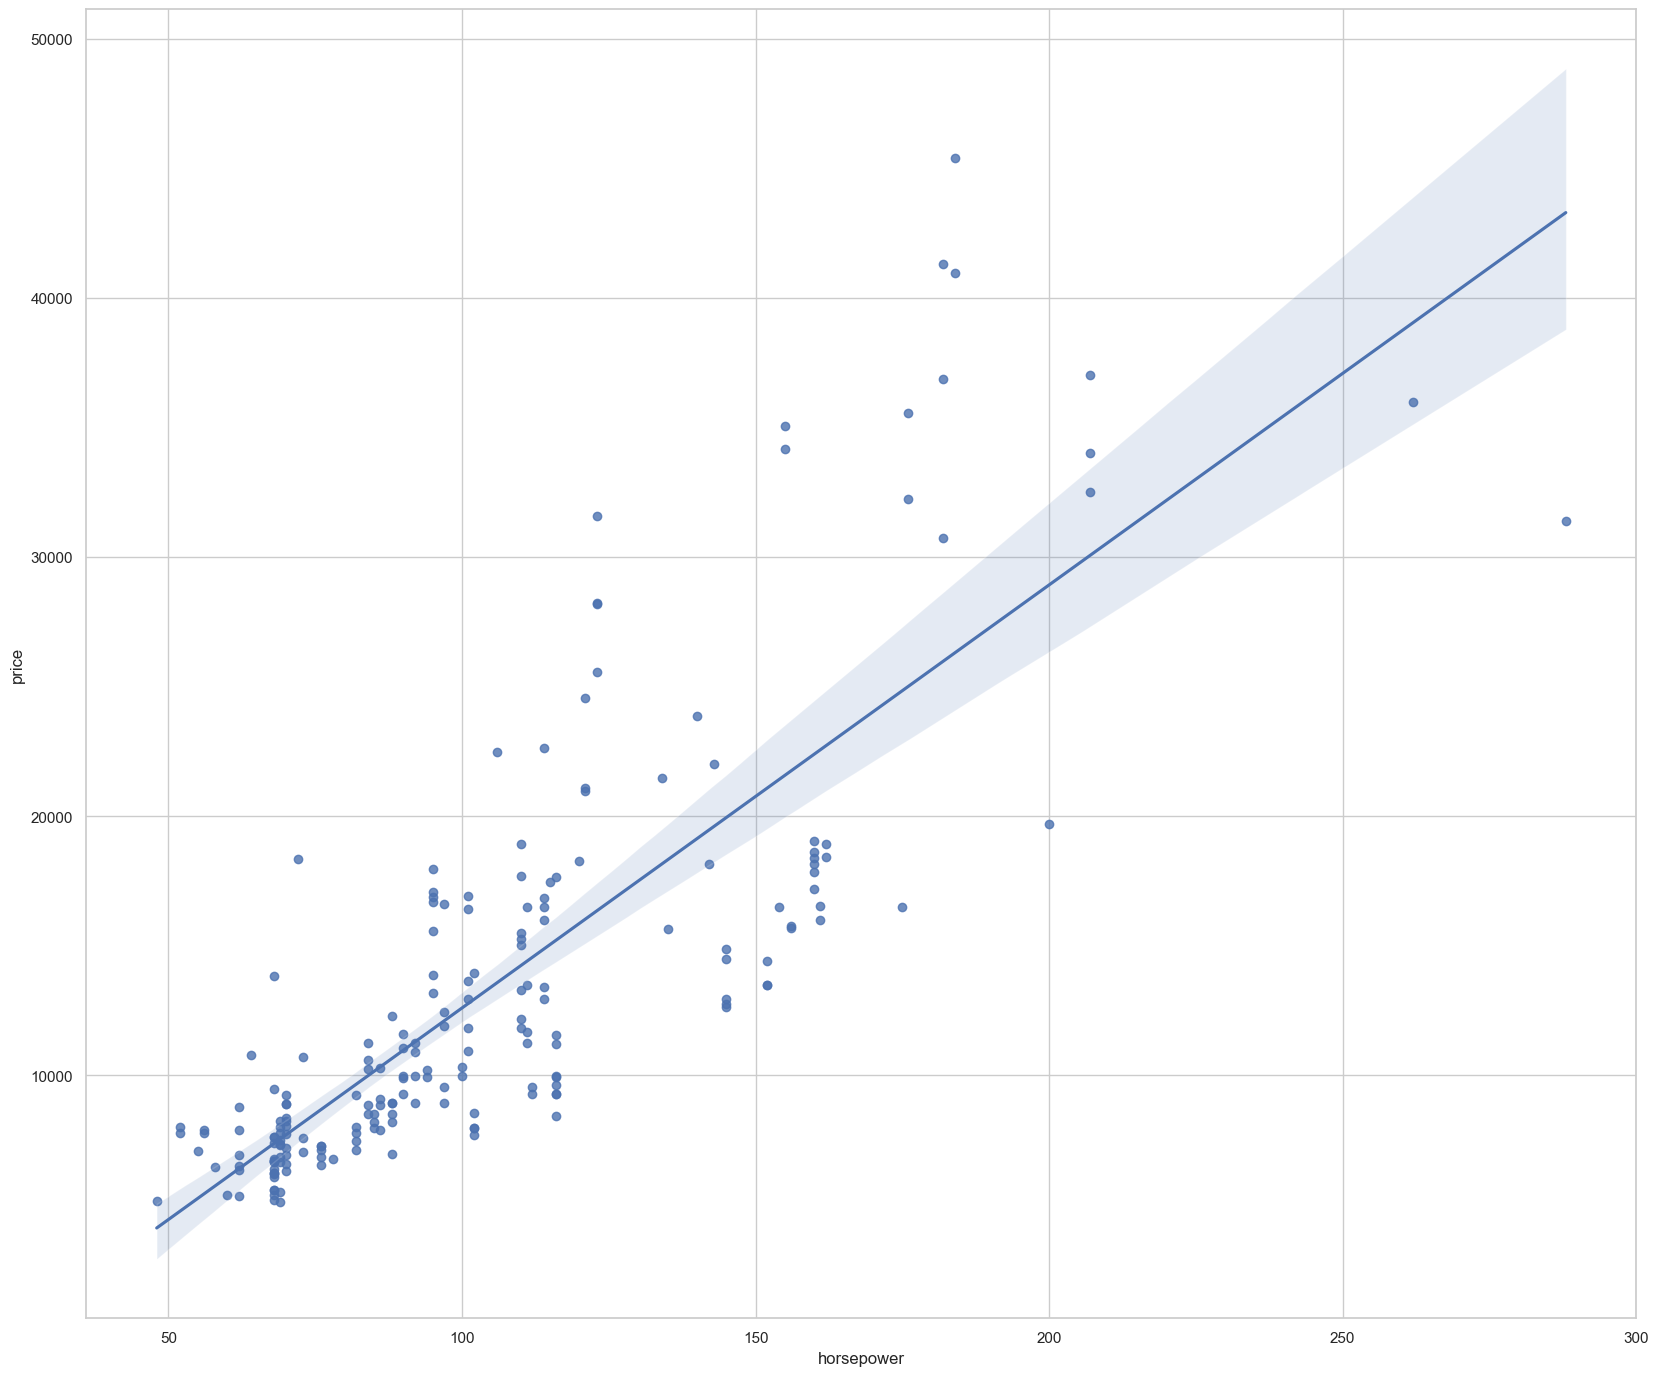

In [47]:
sns.regplot(x='horsepower', y='price', data=cars_lr)

In [ ]:
Вывод: R-квадрат: 0.653. Это означает, что 65.3% вариаций в цене объясняются вариациями мощности. Это достаточно хорошее качество модели.
Модель регрессии показывает значимую положительную зависимость между мощностью и ценой автомобиля. 
При этом мощность объясняет около 65% изменчивости цены, 
однако есть признаки проблем с автокорреляцией и ненормальностью распределения остатков, 
что может свидетельствовать о возможных улучшениях модели.